In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!--fix-missing
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz 
#The above line needs to be changed as per the link to download Apache Spark, So Kindly refer Apache Spark download page
!tar -xvf spark-3.0.1-bin-hadoop2.7.tgz #This line changes as per the file name after the download so make it equal to the last line of the above line after '/'
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7" #make the necessary version changes
import findspark
findspark.init()

/bin/bash: --: invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option
spark-3.0.1-bin-hadoop2.7/
spark-3.0.1-bin-hadoop2.7/RELEASE
spark-3.0.1-bin-hadoop2.7/examples/
spark-3.0.1-bin-hadoop2.7/examples/src/
spark-3.0.1-bin-hadoop2.7/examples/src/main/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examp

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
import os


for dirname, _, filenames in os.walk('/content/AB_NYC_2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
#installing pyspark version 2.3.4
!pip install pyspark==3.0.1

     |████████████████████████████████| 204.2MB 73kB/s 
     |████████████████████████████████| 204kB 42.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=ce702ffa4bf9c25db24dfe5d4046f5ec2ae3bdb26d8c396c973395f4ae04405b
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [4]:
import pyspark
from pyspark import SparkContext
#Starting SparkContext
sc = SparkContext("local","prasannjit")

In [5]:
sqlContext = pyspark.SQLContext(sc)

In [6]:
sc.version

'3.0.1'

In [7]:
from pyspark.sql.types import *

In [8]:
#Defining own schema
#This is done so that there would not be any conflict between datatypes
data_schema = [StructField('id', IntegerType(), True), 
               StructField('name', StringType(), True),
               StructField('host_id', IntegerType(), True),
               StructField('host_name', StringType(), True),
               StructField('neighbourhood_group', StringType(), True),
               StructField('neighbourhood', StringType(), True),
               StructField('latitude', FloatType(), True),
               StructField('longitude', FloatType(), True),
               StructField('room_type', StringType(), True),
               StructField('price', IntegerType(), True),
               StructField('minimum_nights', IntegerType(), True),
               StructField('number_of_reviews', IntegerType(), True),
               StructField('last_review', DateType(), True),
               StructField('reviews_per_month', FloatType(), True),
               StructField('calculated_host_listings_count', IntegerType(), True),
               StructField('availability_365', IntegerType(), True),
              ]

In [9]:
final_struc = StructType(data_schema)

In [11]:
#Reading csv file into spark dataframe using our schema 
df = sqlContext.read.csv('/content/AB_NYC_2019.csv', header = True,schema = final_struc,mode="DROPMALFORMED")

In [12]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_name: string (nullable = true)
 |-- neighbourhood_group: string (nullable = true)
 |-- neighbourhood: string (nullable = true)
 |-- latitude: float (nullable = true)
 |-- longitude: float (nullable = true)
 |-- room_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- last_review: date (nullable = true)
 |-- reviews_per_month: float (nullable = true)
 |-- calculated_host_listings_count: integer (nullable = true)
 |-- availability_365: integer (nullable = true)



#Creating a plot showing top 10 neighbourhoods/neighbourhood_group with highest hotel prices.

In [13]:
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import pyspark.sql.functions as func

In [14]:
df_neigh_gr_pd = df.groupBy("neighbourhood_group").agg(func.mean("price").alias("mean_price")).orderBy('mean_price', ascending=False).toPandas().head(10)

In [15]:
df_neigh_gr_pd

,neighbourhood_group,mean_price
0,Manhattan,196.743216
1,Brooklyn,124.398404
2,Staten Island,114.994595
3,Queens,99.576909
4,Bronx,87.728704
5,Greenwich Village,55.500000
6,Jackson Heights,16.000000
7,Clinton Hill,14.000000
8,Brooklyn Heights,14.000000
9,Upper West Side,13.000000


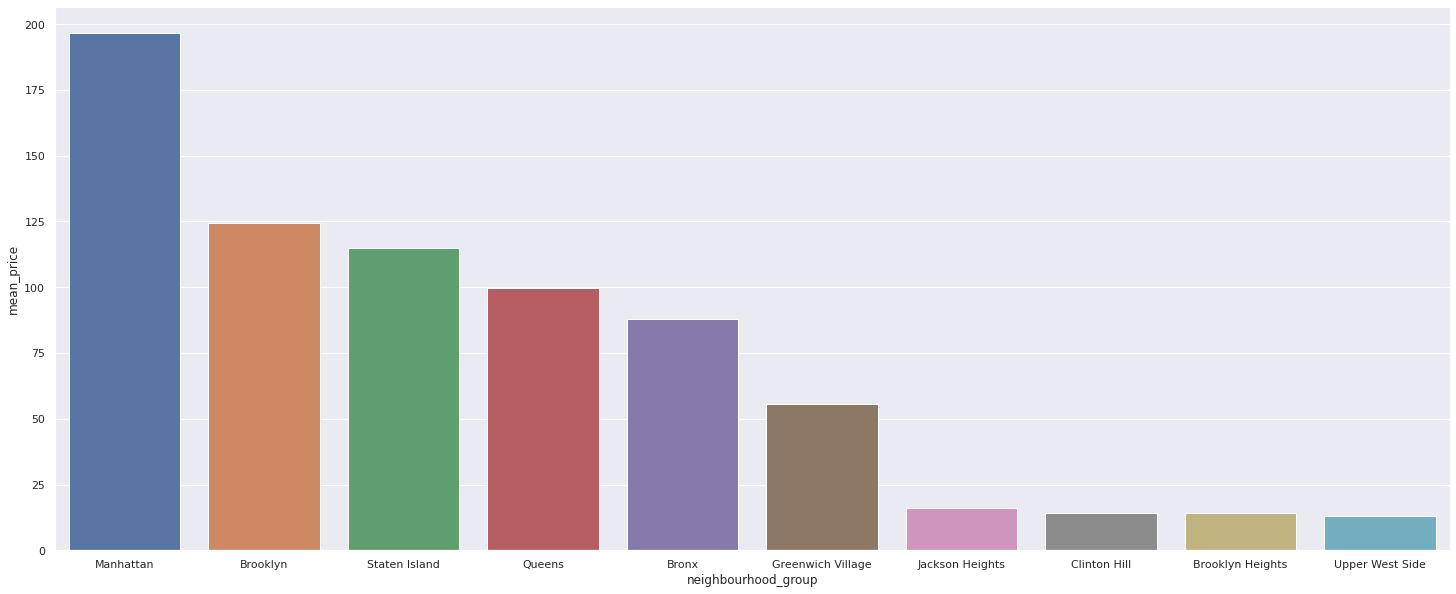

In [16]:
plt.figure(figsize=(25, 10))
sns.barplot(x="neighbourhood_group", y="mean_price", data=df_neigh_gr_pd)

#Finding out the neighbourhood’s average price so that I am able to pick an economical location to book my hotel.

In [17]:
#This will calculate mean price of each distinct neighbourhood
df_neigh_pd = df.groupBy('neighbourhood').agg(func.mean("price").alias("mean_price")).orderBy('mean_price', ascending=True).toPandas().head(500)

In [18]:
df_neigh_pd

,neighbourhood,mean_price
0,None,NaN
1,40.83166,1.000000
2,40.7578,1.000000
3,40.80958,1.000000
4,40.76805,1.000000
...,...,...
373,Riverdale,442.090909
374,Tribeca,490.638418
375,Sea Gate,548.333333
376,Woodrow,700.000000


In [19]:
df_neigh_pd = df_neigh_pd.head(20)

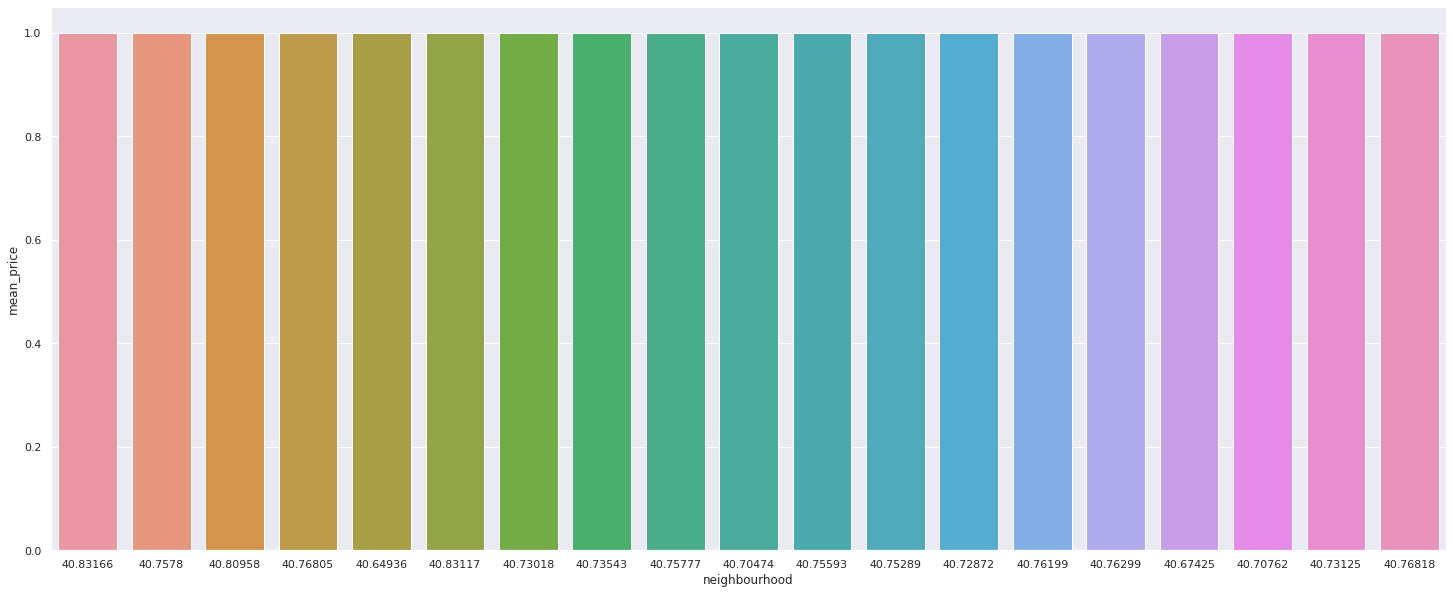

In [20]:
plt.figure(figsize=(25, 10))
sns.barplot(x="neighbourhood", y="mean_price", data=df_neigh_pd)

Finding out the 10 most popular hosts based on number_of_reviews and 
Creating a column named popularity_index depicting popularity of the host.

In [21]:
#calculating sum of reviews for each host_id
df_host_popularity = df.groupby('host_id').agg(func.sum('number_of_reviews').alias('sum_review'))

In [22]:
df_host_popularity

DataFrame[host_id: int, sum_review: bigint]

In [23]:
#calculating total reviews for complete data
total_reviews = df.select(func.sum('number_of_reviews')).head()[0]

In [24]:
total_reviews

1133522

In [25]:
#import udf
from pyspark.sql import udf

import pyspark.sql.functions as F

In [26]:
#Defining function for withcolumn operation and then udf
def func_divide(a1,a2):
  return a1*100.0/float(a2)

In [27]:

divide_func_sp = F.udf(func_divide,FloatType())

In [28]:
divide_func_sp

<function __main__.func_divide>

In [29]:
#withColumn adds new column and applied the function to make new column
df_host_popularity = df_host_popularity.withColumn('total_sum_reviews', F.lit(total_reviews))

In [30]:
df_host_popularity.show()

+--------+----------+-----------------+
| host_id|sum_review|total_sum_reviews|
+--------+----------+-----------------+
|  291112|        35|          1133522|
| 1384111|       103|          1133522|
| 1597481|        13|          1133522|
| 2108853|        18|          1133522|
| 2429432|        27|          1133522|
| 2530670|       134|          1133522|
| 3432742|         2|          1133522|
| 1360296|        13|          1133522|
| 2124690|         1|          1133522|
| 6414252|         1|          1133522|
| 9637768|        47|          1133522|
| 9947836|        87|          1133522|
| 9430366|       159|          1133522|
| 7974574|         5|          1133522|
| 5907325|        32|          1133522|
|13749425|       198|          1133522|
| 5771331|        20|          1133522|
| 9784206|       204|          1133522|
| 4702135|         0|          1133522|
|19239110|        25|          1133522|
+--------+----------+-----------------+
only showing top 20 rows



In [31]:
#creating popularity_index column by diving each host_id reviews by total no. of reviews
df_host_popularity = df_host_popularity.withColumn('popularity_index',divide_func_sp('sum_review','total_sum_reviews'))

In [32]:
df_host_popularity = df_host_popularity.select('host_id','popularity_index')

In [33]:
df_host_popularity.show(10)

+-------+----------------+
|host_id|popularity_index|
+-------+----------------+
| 291112|    0.0030877213|
|1384111|    0.0090867225|
|1597481|    0.0011468679|
|2108853|     0.001587971|
|2429432|    0.0023819564|
|2530670|    0.0118215615|
|3432742|    1.7644122E-4|
|1360296|    0.0011468679|
|2124690|     8.822061E-5|
|6414252|     8.822061E-5|
+-------+----------------+
only showing top 10 rows



In [34]:
#merging the popularity_index to the main dataframe
df = df.join(df_host_popularity, "host_id", "left")

In [35]:
df.show(2)

+-------+----+--------------------+---------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+
|host_id|  id|                name|host_name|neighbourhood_group|neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|popularity_index|
+-------+----+--------------------+---------+-------------------+-------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+
|   2787|2539|Clean & quiet apt...|     John|           Brooklyn|   Kensington|40.64749|-73.97237|   Private room|  149|             1|                9| 2018-10-19|             0.21|                             6|             365|     0.009263163|
|   

#Finding out the top locations where people tend to stay for a longer duration (more than a week) and sorting those by their popularity index.

In [36]:
#spark filter and sorting
df.filter(df['minimum_nights'] > 10).orderBy('popularity_index', ascending=False).select(df['neighbourhood']).show(20)

+------------------+
|     neighbourhood|
+------------------+
|       Murray Hill|
|   Upper East Side|
|       Murray Hill|
|Financial District|
|       Murray Hill|
|Financial District|
|       Murray Hill|
|    Hell's Kitchen|
|       Murray Hill|
|Financial District|
|       Murray Hill|
|       Murray Hill|
|           Midtown|
|       Murray Hill|
|  Theater District|
|       Murray Hill|
|           Chelsea|
|       Murray Hill|
|  Theater District|
|  Theater District|
+------------------+
only showing top 20 rows



Finding out the most popular regions based on the host_id’s popularity_index

In [37]:
df_popular_regions = df.groupby('neighbourhood').agg(func.sum('popularity_index').alias('pop_reg'))

In [38]:
df_popular_regions.show()

+------------------+--------------------+
|     neighbourhood|             pop_reg|
+------------------+--------------------+
|            Corona|  0.3798779395292513|
|      Richmondtown|0.006969428155571222|
|      Prince's Bay|0.002029074006713927|
|       Westerleigh|0.001587970909895...|
|        Mill Basin|0.006087222136557102|
|      Civic Center| 0.09210231501492672|
|        Douglaston|0.021966931177303195|
|        Mount Hope| 0.06351883811294101|
|       Marble Hill|  0.0169383569736965|
|         Rego Park|   0.402727072883863|
|     Dyker Heights| 0.07419353185105138|
| Kew Gardens Hills| 0.03793486161157489|
|      Dongan Hills| 0.01817344536539167|
|Financial District|   26.01537540461868|
|       Bay Terrace| 0.02302557899383828|
|           Midtown|   6.244784004520625|
|   Jackson Heights|  1.0536187172110658|
|           Bayside|  0.1852632757218089|
|    Hell's Kitchen|  15.650335770944366|
|        Highbridge|  0.3594107596145477|
+------------------+--------------

In [39]:
df_popular_regions = df_popular_regions.orderBy('pop_reg', ascending=False).toPandas().head(10)

In [40]:
df_popular_regions.head()

,neighbourhood,pop_reg
0,Financial District,26.015375
1,Bedford-Stuyvesant,23.880260
2,Hell's Kitchen,15.650336
3,Harlem,12.463102
4,Williamsburg,12.265223


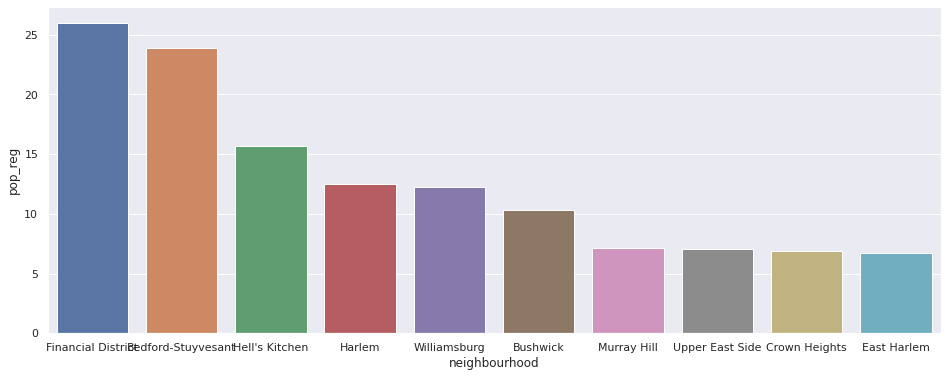

In [41]:
plt.figure(figsize=(16, 6))
sns.barplot(x='neighbourhood', y='pop_reg', data=df_popular_regions)

* Calculating host_id’s popularity in its neighbourhood 
* Creating a column host_neighbourhood_popularity by calculating relative percentage of reviews of host among total reviews in that region.


In [42]:
#Summing no. of reviews for each neighbourhood
df_neighbourhood_sum = df.groupby('neighbourhood').agg(func.sum('number_of_reviews').alias('sum_reviews_ne'))

In [43]:
df_neighbourhood_sum.show(5)

+-------------+--------------+
|neighbourhood|sum_reviews_ne|
+-------------+--------------+
|       Corona|          1806|
| Richmondtown|            79|
| Prince's Bay|            23|
|  Westerleigh|            18|
|   Mill Basin|            69|
+-------------+--------------+
only showing top 5 rows



In [44]:
df_neighbourhood_host_sum = df.groupby('host_id','neighbourhood').agg(func.sum('number_of_reviews').alias('sum_reviews_id_ne'))

In [45]:
df_neighbourhood_host_sum.show()

+--------+--------------------+-----------------+
| host_id|       neighbourhood|sum_reviews_id_ne|
+--------+--------------------+-----------------+
|  829652|            Gramercy|              105|
| 1269455|        West Village|               37|
| 1498424|         Fort Greene|               35|
| 1633100|            Bushwick|               42|
|  160565|  Bedford-Stuyvesant|                3|
| 4241953|            Flushing|               81|
| 3898812|             Astoria|               58|
| 6873370|         Sunset Park|               24|
|  173980|  Bedford-Stuyvesant|              181|
| 1472225|        East Village|               59|
|11192207|     Upper West Side|                2|
|10930874|        Forest Hills|                1|
|16288928|          Park Slope|              136|
| 9604972|     Lower East Side|                1|
|17604079|              Harlem|                1|
|17773625|             Tribeca|               73|
| 2119276|     Upper East Side|               20|


In [46]:
#merging column
df_neighbourhood_host_merged = df_neighbourhood_host_sum.join(df_neighbourhood_sum,'neighbourhood','left')

In [47]:
df_neighbourhood_host_merged.filter(df['neighbourhood'] == 'Williamsburg').orderBy('host_id', ascending=True).show(10)

+-------------+-------+-----------------+--------------+
|neighbourhood|host_id|sum_reviews_id_ne|sum_reviews_ne|
+-------------+-------+-----------------+--------------+
| Williamsburg|   2438|                1|         85368|
| Williamsburg|  10889|              383|         85368|
| Williamsburg|  15991|              148|         85368|
| Williamsburg|  19402|               37|         85368|
| Williamsburg|  21207|                9|         85368|
| Williamsburg|  21306|                2|         85368|
| Williamsburg|  39304|                0|         85368|
| Williamsburg|  45384|               20|         85368|
| Williamsburg|  51414|                9|         85368|
| Williamsburg|  52043|               53|         85368|
+-------------+-------+-----------------+--------------+
only showing top 10 rows



In [48]:
def func_divide(a1,a2):
  if(a2!=0):
    ans = a1*100.0/float(a2)
  else:
    ans = 0
  return ans

In [49]:
divide_func_sp = F.udf(func_divide,FloatType())

In [50]:
df_neighbourhood_host_merged = df_neighbourhood_host_merged.withColumn('host_neighbourhood_popularity',divide_func_sp('sum_reviews_id_ne','sum_reviews_ne'))

In [51]:
df_neighbourhood_host_merged.show()

+-------------+---------+-----------------+--------------+-----------------------------+
|neighbourhood|  host_id|sum_reviews_id_ne|sum_reviews_ne|host_neighbourhood_popularity|
+-------------+---------+-----------------+--------------+-----------------------------+
|       Corona|265288059|                7|          1806|                    0.3875969|
|       Corona|176679165|              156|          1806|                     8.637874|
|       Corona| 32446721|              100|          1806|                    5.5370984|
|       Corona|124042625|                4|          1806|                   0.22148395|
|       Corona| 44620317|              114|          1806|                    6.3122926|
|       Corona| 34129674|                0|          1806|                          0.0|
|       Corona|  5261297|               45|          1806|                    2.4916945|
|       Corona| 98697139|               43|          1806|                    2.3809524|
|       Corona| 31307

In [52]:
df_neighbourhood_host_merged.show()
#error when trying to sort according to the output column i.e., host_neighbourhood_popularity

+-------------+---------+-----------------+--------------+-----------------------------+
|neighbourhood|  host_id|sum_reviews_id_ne|sum_reviews_ne|host_neighbourhood_popularity|
+-------------+---------+-----------------+--------------+-----------------------------+
|       Corona|265288059|                7|          1806|                    0.3875969|
|       Corona|176679165|              156|          1806|                     8.637874|
|       Corona| 32446721|              100|          1806|                    5.5370984|
|       Corona|124042625|                4|          1806|                   0.22148395|
|       Corona| 44620317|              114|          1806|                    6.3122926|
|       Corona| 34129674|                0|          1806|                          0.0|
|       Corona|  5261297|               45|          1806|                    2.4916945|
|       Corona| 98697139|               43|          1806|                    2.3809524|
|       Corona| 31307

In [53]:
df_neighbourhood_host_merged = df_neighbourhood_host_merged.select('host_id','neighbourhood','host_neighbourhood_popularity')

In [54]:
df_neighbourhood_host_merged.show(5)

+---------+-------------+-----------------------------+
|  host_id|neighbourhood|host_neighbourhood_popularity|
+---------+-------------+-----------------------------+
|265288059|       Corona|                    0.3875969|
|176679165|       Corona|                     8.637874|
| 32446721|       Corona|                    5.5370984|
|124042625|       Corona|                   0.22148395|
| 44620317|       Corona|                    6.3122926|
+---------+-------------+-----------------------------+
only showing top 5 rows



In [55]:
#To validate results, for baychester the sum of all the host_neighbourhood_popularity = 100.0
df_neighbourhood_host_merged.filter(df_neighbourhood_host_merged['neighbourhood']=='Baychester').show()

+---------+-------------+-----------------------------+
|  host_id|neighbourhood|host_neighbourhood_popularity|
+---------+-------------+-----------------------------+
|209306758|   Baychester|                     6.774194|
| 64425305|   Baychester|                    0.9677419|
|246653349|   Baychester|                     3.548387|
|129890157|   Baychester|                          0.0|
| 57165692|   Baychester|                     88.70968|
+---------+-------------+-----------------------------+



In [56]:
df = df.join(df_neighbourhood_host_merged,['host_id','neighbourhood'],'left')

In [57]:
df.filter(df['host_neighbourhood_popularity']>90).show(2)

+--------+-------------+--------+--------------------+---------+-------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+-----------------------------+
| host_id|neighbourhood|      id|                name|host_name|neighbourhood_group|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|popularity_index|host_neighbourhood_popularity|
+--------+-------------+--------+--------------------+---------+-------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+-----------------------------+
| 6402171|    Rossville|26258351|Escape NYC in the...|    Taryn|      Staten Island| 40.5479|-74.21017|Entire home/apt|   75|             3|        

Finding:

* Maximum revenue in Private Rooms
* Minimum revenue in Private Rooms
* Maximum revenue in Entire Homes
* Minimum revenue in Entire Homes

In [58]:
#Filtering only private room and entire room
df_neighbourhood_room_type = df.filter(df['room_type'] != 'Shared room')

In [59]:
df_neighbourhood_room_type = df_neighbourhood_room_type.groupby('neighbourhood','room_type').agg(func.sum('price').alias('price_sum'))

In [60]:
df_neighbourhood_room_type.show()

+-----------------+---------------+---------+
|    neighbourhood|      room_type|price_sum|
+-----------------+---------------+---------+
|Battery Park City|Entire home/apt|    23450|
|   Morris Heights|Entire home/apt|      421|
|     Coney Island|   Private room|      480|
|Battery Park City|   Private room|     2224|
|        Unionport|   Private room|      225|
|   Williamsbridge|Entire home/apt|     2818|
|          Arverne|   Private room|     2369|
|       Morrisania|   Private room|      623|
|       Kensington|   Private room|     5819|
|    Schuylerville|   Private room|      624|
|             NoHo|Entire home/apt|    21474|
|      Murray Hill|   Private room|    10335|
|        Laurelton|   Private room|      552|
|         Glendale|Entire home/apt|     3420|
|      Boerum Hill|Entire home/apt|    27624|
|       Ozone Park|Entire home/apt|     3649|
|     Williamsburg|   Private room|   170841|
|  Upper West Side|Entire home/apt|   328724|
|  East Morrisania|   Private room

In [61]:
#pivot operation 
df_neighbourhood_room_type = df_neighbourhood_room_type.groupby('neighbourhood').pivot('room_type').sum('price_sum')

In [62]:
df_neighbourhood_room_type.show()

+------------------+---------------+------------+
|     neighbourhood|Entire home/apt|Private room|
+------------------+---------------+------------+
|            Corona|           1549|        1485|
|      Prince's Bay|           1520|         118|
|      Richmondtown|             78|        null|
|        Mill Basin|            719|        null|
|       Westerleigh|            103|          40|
|      Civic Center|           7925|        2056|
|        Douglaston|            402|         215|
|        Mount Hope|           1079|         471|
|       Marble Hill|            459|         611|
|         Rego Park|           5085|        3486|
|     Dyker Heights|            804|         278|
| Kew Gardens Hills|           2052|         868|
|      Dongan Hills|            405|         151|
|       Bay Terrace|            631|         189|
|Financial District|         138853|       26831|
|           Bayside|           4616|        1544|
|   Jackson Heights|           7232|        7137|


In [63]:
#Maximum revenue in Private Rooms
df_neighbourhood_room_type.orderBy('Private room', ascending=False).show(1)

+-------------+---------------+------------+
|neighbourhood|Entire home/apt|Private room|
+-------------+---------------+------------+
| Williamsburg|         389426|      170841|
+-------------+---------------+------------+
only showing top 1 row



In [64]:
df_min = df_neighbourhood_room_type.orderBy('Private room', ascending=True)

In [65]:
#Minimum revenue in Private Rooms after filetering out null values
df_min[df_min['Private room'].isNotNull()].show(1)

+-------------+---------------+------------+
|neighbourhood|Entire home/apt|Private room|
+-------------+---------------+------------+
| Graniteville|            186|          20|
+-------------+---------------+------------+
only showing top 1 row



In [66]:
##minimum revenue in Entire home/apt Rooms
df_neighbourhood_room_type.orderBy('Entire home/apt', ascending=True).filter(df_neighbourhood_room_type['Entire home/apt'].isNotNull()).show(1)

+-------------+---------------+------------+
|neighbourhood|Entire home/apt|Private room|
+-------------+---------------+------------+
|     New Dorp|             57|        null|
+-------------+---------------+------------+
only showing top 1 row



In [67]:
###maximum revenue in Entire home/apt Rooms

df_neighbourhood_room_type.orderBy('Entire home/apt', ascending=False).show(1)

+-------------+---------------+------------+
|neighbourhood|Entire home/apt|Private room|
+-------------+---------------+------------+
| Williamsburg|         389426|      170841|
+-------------+---------------+------------+
only showing top 1 row



#Calculating the average price income for private rooms and entire homes for each of the neighbourhoods 

In [68]:
df_neighbourhood_room_type_mean = df.filter(df['room_type'] != 'Shared room')

In [69]:
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.groupby('neighbourhood','room_type').agg(func.mean('price').alias('average_region_price'))

In [70]:
df_neighbourhood_room_type_mean_pivot = df_neighbourhood_room_type_mean.groupby('neighbourhood').pivot('room_type').sum('average_region_price')

In [71]:

df_neighbourhood_room_type_mean_pivot.show()

+------------------+------------------+------------------+
|     neighbourhood|   Entire home/apt|      Private room|
+------------------+------------------+------------------+
|            Corona|119.15384615384616|              55.0|
|      Prince's Bay| 506.6666666666667|             118.0|
|      Richmondtown|              78.0|              null|
|        Mill Basin|            179.75|              null|
|       Westerleigh|             103.0|              40.0|
|      Civic Center|226.42857142857142|120.94117647058823|
|        Douglaston|             134.0|             53.75|
|        Mount Hope|             107.9|              47.1|
|       Marble Hill|              91.8| 87.28571428571429|
|         Rego Park|           127.125| 59.08474576271186|
|     Dyker Heights|114.85714285714286|              69.5|
| Kew Gardens Hills|120.70588235294117| 96.44444444444444|
|      Dongan Hills|            101.25|50.333333333333336|
|       Bay Terrace|210.33333333333334|              94.

In [72]:
df_neighbourhood_room_type_mean_pivot = df_neighbourhood_room_type_mean_pivot.toPandas()

<Figure size 4320x5760 with 0 Axes>

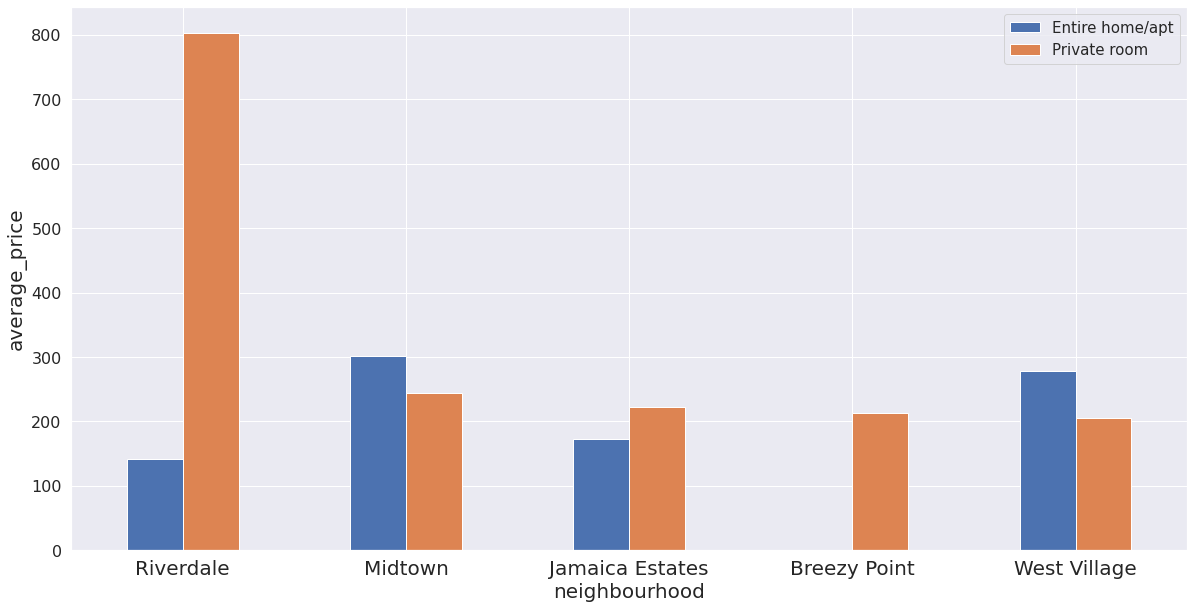

In [82]:
#Plotting 
plt.figure(figsize=(60, 80))
labels = []
import matplotlib.pyplot as plt
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
a = [item.get_text() for item in ax.get_xticklabels()]  #to get labels as they are coming as index
for i in a:
  labels.append(df_neighbourhood_room_type_mean_pivot['neighbourhood'][int(i)])
ax.set_xticklabels(labels)  #setting xticks as neighbourhood name
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation('horizontal')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)     
plt.rcParams["figure.figsize"] = fig_size
plt.legend(prop={'size':'15'})
plt.show(ax)

# Creating a column depicting relative price difference of that host with respect to the neighbourhood’s average pricing.

In [74]:
df = df.join(df_neighbourhood_room_type_mean,['neighbourhood','room_type'],'left')

In [75]:
df.filter(df['neighbourhood'] == 'Kensington').show()

+-------------+------------+---------+--------+--------------------+---------+-------------------+--------+---------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+-----------------------------+--------------------+
|neighbourhood|   room_type|  host_id|      id|                name|host_name|neighbourhood_group|latitude|longitude|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|popularity_index|host_neighbourhood_popularity|average_region_price|
+-------------+------------+---------+--------+--------------------+---------+-------------------+--------+---------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+-----------------------------+--------------------+
|   Kensington|Private room|  6755111| 1239293|Cozy Retreat in B...|  Jessica|           Br

In [76]:
#Filtering out null values for price
temp1 = df.filter(df['price'].isNotNull())

In [77]:
#Filtering out null values for average_region_price
temp1 = temp1.filter(temp1['average_region_price'].isNotNull())

In [78]:
#Defining function and converting it to udf function for with column operation
def func_divide1(a1,a2):
  if(type(a1)=='NoneType' or type(a2)=='NoneType'):
    ans = 0
  elif(a1!=0):
    ans = ((a1-a2)*100.0)/float(a1)
  else:
    ans = 0
  return ans

divide_func_sp1 = F.udf(func_divide1,FloatType())

In [79]:
#withcolumn operation
df = temp1.withColumn('region_price_margin',divide_func_sp1('price','average_region_price'))

In [80]:
df.show(1)

+-----------------+---------------+---------+--------+--------------------+---------+-------------------+--------+---------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+-----------------------------+--------------------+-------------------+
|    neighbourhood|      room_type|  host_id|      id|                name|host_name|neighbourhood_group|latitude|longitude|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|popularity_index|host_neighbourhood_popularity|average_region_price|region_price_margin|
+-----------------+---------------+---------+--------+--------------------+---------+-------------------+--------+---------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+----------------+-----------------------------+--------------------+-------------------+
|Battery P